<a href="https://colab.research.google.com/github/tomonari-masada/courses/blob/master/assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A. 下準備

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 ### 1) データの読み込み

ここは各自のやり方で。

In [2]:
df0 = pd.read_csv('lifesat.csv')

### 2) test dataである日本のデータを保存しておく

In [3]:
# 日本だけを取り出す
df_test = df0[df0['Country'] == 'Japan']

In [4]:
df_test

,Country,GDP per capita,Life satisfaction
12,Japan,32485.545,5.9


### 3) test data以外のデータだけを取り出しておく

最後に日本について予測をおこなうまでは、ここで作ったデータ集合だけを使う。

In [5]:
df = df0.drop(df0.index[df0['Country'] == 'Japan'])

In [6]:
df

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1
5,Estonia,17288.083,5.6
6,Greece,18064.288,4.8
7,Portugal,19121.592,5.1
8,Slovenia,20732.482,5.7
9,Spain,25864.721,6.5


### 4) Numpyの配列に変換してしまう（こうしない方法もある）

In [7]:
countries = df['Country'].to_numpy()
gdp = df['GDP per capita'].to_numpy()
lifesat = df['Life satisfaction'].to_numpy()

n_data = len(gdp)

データ数を見る（日本以外の国の数）。

In [8]:
print(n_data)

28


 ### 5) 各国の国名とGDP per capitaを表示させるループを書いてみる

In [9]:
for i in range(n_data):
  print(countries[i], gdp[i])

Russia 9054.914
Turkey 9437.372
Hungary 12239.893999999998
Poland 12495.334
Slovak Republic 15991.736
Estonia 17288.083
Greece 18064.288
Portugal 19121.592
Slovenia 20732.482
Spain 25864.721
Korea 27195.197
Italy 29866.581
Israel 35343.336
New Zealand 37044.891
France 37675.006
Belgium 40106.63200000001
Germany 40996.511
Finland 41973.988
Canada 43331.961
Netherlands 43603.115
Austria 43724.031
United Kingdom 43770.688
Sweden 49866.266
Iceland 50854.583
Australia 50961.865
Ireland 51350.74400000001
Denmark 52114.165
United States 55805.20400000001


## B. 少しずつ、k-NNのleave-one-out cross validationのロジックを実装していく

* 最初は単純なコードを、少しずつ拡充していきます。
* なので、これ以降の各セルにあるコードは、直前のセルと重複する部分が多くなっています。
* 実際に自分でコードを書くときも、一気に書こうとせずに、ここで示しているように、少しずつ機能を増やしていくのがよいでしょう。

### 6) 添字iの国のGDP per capitaに近い順に、他のすべての国を並べ替えるところまで、実装してみる。

In [10]:
for i in range(n_data):

  # 添字がiの国のGDP per capitaと国名を取得する。
  gdp_valid = gdp[i]
  country = countries[i]

  # すべての国の値から、添字iの国のGDP per capitaを、一斉に引き算し、絶対値をとる。
  abs_diff = np.abs(gdp - gdp_valid)

  # こうして求めた差の絶対値をソートし、添字がどう並び替わるかを、調べる。
  sorted_indices = np.argsort(abs_diff)
  print(country, sorted_indices) 

  # 並び変わった添字をそのまま使って、国を表示させてみる。
  # 当然、添字iの国自身が、先頭に来る。
  print('{:s}のGDP per capitaに近い順に他の国を並べると：　'.format(country), countries[sorted_indices])

Russia [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
RussiaのGDP per capitaに近い順に他の国を並べると：　 ['Russia' 'Turkey' 'Hungary' 'Poland' 'Slovak Republic' 'Estonia' 'Greece'
 'Portugal' 'Slovenia' 'Spain' 'Korea' 'Italy' 'Israel' 'New Zealand'
 'France' 'Belgium' 'Germany' 'Finland' 'Canada' 'Netherlands' 'Austria'
 'United Kingdom' 'Sweden' 'Iceland' 'Australia' 'Ireland' 'Denmark'
 'United States']
Turkey [ 1  0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
TurkeyのGDP per capitaに近い順に他の国を並べると：　 ['Turkey' 'Russia' 'Hungary' 'Poland' 'Slovak Republic' 'Estonia' 'Greece'
 'Portugal' 'Slovenia' 'Spain' 'Korea' 'Italy' 'Israel' 'New Zealand'
 'France' 'Belgium' 'Germany' 'Finland' 'Canada' 'Netherlands' 'Austria'
 'United Kingdom' 'Sweden' 'Iceland' 'Australia' 'Ireland' 'Denmark'
 'United States']
Hungary [ 2  3  1  0  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
HungaryのGDP per capitaに近い順に他の国を並べ

### 7) 添字iの国に近い順に並べ替えられた国の、上位kカ国について、単に生活満足度を表示させるところまで、書いてみる。

In [11]:
# 内側のループでは、添字は、1から、動かす。
# なぜなら、添字0に対応するのは、自分自身だから。

for i in range(n_data):
  gdp_valid = gdp[i]
  country = countries[i]
  sorted_indices = np.argsort(np.abs(gdp - gdp_valid)) 
  # 添字iの国に最も近いkカ国の生活満足度を、とりあえずそのまま表示させる。
  # 添字iの国自身は除くので、　range()は0ではなく1からスタート。
  for k in range(1, n_data):
    print("{:s}に近い{:d}カ国の生活満足度一覧".format(country, k), end=' ')
    print(lifesat[sorted_indices[1:k+1]])

Russiaに近い1カ国の生活満足度一覧 [5.6]
Russiaに近い2カ国の生活満足度一覧 [5.6 4.9]
Russiaに近い3カ国の生活満足度一覧 [5.6 4.9 5.8]
Russiaに近い4カ国の生活満足度一覧 [5.6 4.9 5.8 6.1]
Russiaに近い5カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6]
Russiaに近い6カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8]
Russiaに近い7カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1]
Russiaに近い8カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7]
Russiaに近い9カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5]
Russiaに近い10カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8]
Russiaに近い11カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8 6. ]
Russiaに近い12カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8 6.  7.4]
Russiaに近い13カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8 6.  7.4 7.3]
Russiaに近い14カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8 6.  7.4 7.3 6.5]
Russiaに近い15カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8 6.  7.4 7.3 6.5 6.9]
Russiaに近い16カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8 6.  7.4 7.3 6.5 6.9 7. ]
Russiaに近い17カ国の生活満足度一覧 [5.6 4.9 5.8 6.1 5.6 4.8 5.1 5.7 6.5 5.8 6.  7.4 7.3 6.5 6.

### 8) 添字iの国に近い順に並べ替えられた国の、上位kカ国について、それらの生活満足度の平均を表示させるところまで、書いてみる。

* この平均値を、添字iの国の生活満足度の予測値として使う。

In [12]:
for i in range(n_data):
  gdp_valid = gdp[i]
  country = countries[i]
  sorted_indices = np.argsort(np.abs(gdp - gdp_valid)) 

  # 添字iの国に最も近いkカ国の生活満足度の平均を表示させる
  for k in range(1, n_data):
    print("{:s}に近い{:d}カ国の生活満足度の平均（これを予測値として使う）".format(country, k), end=' ')
    print(np.mean(lifesat[sorted_indices[1:k+1]]))

Russiaに近い1カ国の生活満足度の平均（これを予測値として使う） 5.6
Russiaに近い2カ国の生活満足度の平均（これを予測値として使う） 5.25
Russiaに近い3カ国の生活満足度の平均（これを予測値として使う） 5.433333333333334
Russiaに近い4カ国の生活満足度の平均（これを予測値として使う） 5.6
Russiaに近い5カ国の生活満足度の平均（これを予測値として使う） 5.6
Russiaに近い6カ国の生活満足度の平均（これを予測値として使う） 5.466666666666666
Russiaに近い7カ国の生活満足度の平均（これを予測値として使う） 5.414285714285714
Russiaに近い8カ国の生活満足度の平均（これを予測値として使う） 5.449999999999999
Russiaに近い9カ国の生活満足度の平均（これを予測値として使う） 5.566666666666666
Russiaに近い10カ国の生活満足度の平均（これを予測値として使う） 5.589999999999999
Russiaに近い11カ国の生活満足度の平均（これを予測値として使う） 5.627272727272726
Russiaに近い12カ国の生活満足度の平均（これを予測値として使う） 5.7749999999999995
Russiaに近い13カ国の生活満足度の平均（これを予測値として使う） 5.892307692307692
Russiaに近い14カ国の生活満足度の平均（これを予測値として使う） 5.935714285714285
Russiaに近い15カ国の生活満足度の平均（これを予測値として使う） 6.0
Russiaに近い16カ国の生活満足度の平均（これを予測値として使う） 6.0625
Russiaに近い17カ国の生活満足度の平均（これを予測値として使う） 6.141176470588236
Russiaに近い18カ国の生活満足度の平均（これを予測値として使う） 6.205555555555556
Russiaに近い19カ国の生活満足度の平均（これを予測値として使う） 6.2631578947368425
Russiaに近い20カ国の生活満足度の平均（これを予測値として使う） 6.295
Russiaに近い21カ国の生活満足度

### 9) 添字iの国に近い順に並べ替えられた国のうち、上位kカ国の生活満足度の平均を、添字iの国の生活満足度の予測値として使う。そして、予測誤差を求めるところまで、書いてみる。

In [13]:
for i in range(n_data):
  gdp_valid = gdp[i]
  country = countries[i]
  sorted_indices = np.argsort(np.abs(gdp - gdp_valid)) 

  # i番目の国に最も近いkカ国の生活満足度の平均と、i番目の国の生活満足度の差の絶対値を表示する
  for k in range(1, n_data):
    prediction = np.mean(lifesat[sorted_indices[1:k+1]])
    error = np.abs(lifesat[i] - prediction)
    print("{:s}の生活満足度を、最も近い{:d}カ国を使って予測したときの誤差".format(countries[i], k), end=' ')
    print(error)

Russiaの生活満足度を、最も近い1カ国を使って予測したときの誤差 0.40000000000000036
Russiaの生活満足度を、最も近い2カ国を使って予測したときの誤差 0.75
Russiaの生活満足度を、最も近い3カ国を使って予測したときの誤差 0.5666666666666664
Russiaの生活満足度を、最も近い4カ国を使って予測したときの誤差 0.40000000000000036
Russiaの生活満足度を、最も近い5カ国を使って予測したときの誤差 0.40000000000000036
Russiaの生活満足度を、最も近い6カ国を使って予測したときの誤差 0.5333333333333341
Russiaの生活満足度を、最も近い7カ国を使って予測したときの誤差 0.5857142857142863
Russiaの生活満足度を、最も近い8カ国を使って予測したときの誤差 0.5500000000000007
Russiaの生活満足度を、最も近い9カ国を使って予測したときの誤差 0.43333333333333357
Russiaの生活満足度を、最も近い10カ国を使って予測したときの誤差 0.41000000000000103
Russiaの生活満足度を、最も近い11カ国を使って予測したときの誤差 0.3727272727272739
Russiaの生活満足度を、最も近い12カ国を使って予測したときの誤差 0.22500000000000053
Russiaの生活満足度を、最も近い13カ国を使って予測したときの誤差 0.1076923076923082
Russiaの生活満足度を、最も近い14カ国を使って予測したときの誤差 0.06428571428571495
Russiaの生活満足度を、最も近い15カ国を使って予測したときの誤差 0.0
Russiaの生活満足度を、最も近い16カ国を使って予測したときの誤差 0.0625
Russiaの生活満足度を、最も近い17カ国を使って予測したときの誤差 0.14117647058823568
Russiaの生活満足度を、最も近い18カ国を使って予測したときの誤差 0.2055555555555557
Russiaの生活満足度を、最も近い19カ国を使って予測したときの誤差 0.26315789473684

### 10) 添字がiの国について、kを1から順に増やしていったときの、それぞれの場合の予測誤差を、ひとつのリストにまとめる。

In [14]:
for i in range(n_data):
  gdp_valid = gdp[i]
  country = countries[i]
  sorted_indices = np.argsort(np.abs(gdp - gdp_valid)) 
  errors = list()
  for k in range(1, n_data):
    prediction = np.mean(lifesat[sorted_indices[1:k+1]])
    error = np.abs(lifesat[i] - prediction)
    errors.append(error)
  print('{:s}の生活満足度を予測させた時の誤差をまとめた配列'.format(country), errors)

Russiaの生活満足度を予測させた時の誤差をまとめた配列 [0.40000000000000036, 0.75, 0.5666666666666664, 0.40000000000000036, 0.40000000000000036, 0.5333333333333341, 0.5857142857142863, 0.5500000000000007, 0.43333333333333357, 0.41000000000000103, 0.3727272727272739, 0.22500000000000053, 0.1076923076923082, 0.06428571428571495, 0.0, 0.0625, 0.14117647058823568, 0.2055555555555557, 0.2631578947368425, 0.29499999999999993, 0.3190476190476197, 0.35909090909090935, 0.4086956521739129, 0.44583333333333286, 0.46799999999999997, 0.5076923076923077, 0.5333333333333323]
Turkeyの生活満足度を予測させた時の誤差をまとめた配列 [0.40000000000000036, 0.14999999999999947, 0.033333333333333215, 0.09999999999999964, 0.08000000000000007, 0.06666666666666732, 0.128571428571429, 0.09999999999999964, 0.011111111111111072, 0.03000000000000025, 0.06363636363636349, 0.20833333333333393, 0.3230769230769237, 0.36428571428571477, 0.42666666666666764, 0.4875000000000007, 0.5647058823529418, 0.6277777777777782, 0.6842105263157903, 0.7150000000000007, 0.73809523809

### 11) 各国の予測誤差のリストを、すべてひとつのリストにまとめる。

* リストのリストができる。
* これをNumpyの配列へ変換する。

In [15]:
errors_for_all = list()
for i in range(n_data):
  gdp_valid = gdp[i] 
  sorted_indices = np.argsort(np.abs(gdp - gdp_valid)) 
  errors = list()
  for k in range(1, n_data):
    error = np.abs(np.mean(lifesat[sorted_indices[1:k+1]] - lifesat[i]))
    errors.append(error)
  errors_for_all.append(errors)
errors_for_all = np.array(errors_for_all)
print(errors_for_all)

[[4.00000000e-01 7.50000000e-01 5.66666667e-01 4.00000000e-01
  4.00000000e-01 5.33333333e-01 5.85714286e-01 5.50000000e-01
  4.33333333e-01 4.10000000e-01 3.72727273e-01 2.25000000e-01
  1.07692308e-01 6.42857143e-02 5.92118946e-17 6.25000000e-02
  1.41176471e-01 2.05555556e-01 2.63157895e-01 2.95000000e-01
  3.19047619e-01 3.59090909e-01 4.08695652e-01 4.45833333e-01
  4.68000000e-01 5.07692308e-01 5.33333333e-01]
 [4.00000000e-01 1.50000000e-01 3.33333333e-02 1.00000000e-01
  8.00000000e-02 6.66666667e-02 1.28571429e-01 1.00000000e-01
  1.11111111e-02 3.00000000e-02 6.36363636e-02 2.08333333e-01
  3.23076923e-01 3.64285714e-01 4.26666667e-01 4.87500000e-01
  5.64705882e-01 6.27777778e-01 6.84210526e-01 7.15000000e-01
  7.38095238e-01 7.77272727e-01 8.26086957e-01 8.62500000e-01
  8.84000000e-01 9.23076923e-01 9.48148148e-01]
 [9.00000000e-01 8.00000000e-01 9.00000000e-01 9.75000000e-01
  9.20000000e-01 7.50000000e-01 6.71428571e-01 6.87500000e-01
  7.88888889e-01 8.00000000e-01 8.27

### 12) すべての国について行った予測の誤差の平均を求める。

* これで、上位何カ国をとったときの誤差平均がいくらかが、分かる。

In [16]:
errors_for_all = list()
for i in range(n_data):
  gdp_valid = gdp[i] 
  sorted_indices = np.argsort(np.abs(gdp - gdp_valid)) 
  errors = list()
  for k in range(1, n_data):
    error = np.abs(np.mean(lifesat[sorted_indices[1:k+1]] - lifesat[i]))
    errors.append(error)
  errors_for_all.append(errors)
errors_for_all = np.array(errors_for_all)
mean_errors = np.mean(errors_for_all, axis=0)
print(mean_errors)
print('\n'.join(['上位{:d}カ国を使って予測したときの誤差の平均: {:f}'.format(k, mean_errors[k-1]) for k in range(1, n_data)]))

[0.425      0.3875     0.37619048 0.37142857 0.375      0.35714286
 0.35867347 0.33928571 0.31825397 0.31035714 0.31298701 0.33184524
 0.35769231 0.36734694 0.36880952 0.38928571 0.42605042 0.45277778
 0.48571429 0.52571429 0.57380952 0.61022727 0.63819876 0.66875
 0.71057143 0.74258242 0.76190476]
上位1カ国を使って予測したときの誤差の平均: 0.425000
上位2カ国を使って予測したときの誤差の平均: 0.387500
上位3カ国を使って予測したときの誤差の平均: 0.376190
上位4カ国を使って予測したときの誤差の平均: 0.371429
上位5カ国を使って予測したときの誤差の平均: 0.375000
上位6カ国を使って予測したときの誤差の平均: 0.357143
上位7カ国を使って予測したときの誤差の平均: 0.358673
上位8カ国を使って予測したときの誤差の平均: 0.339286
上位9カ国を使って予測したときの誤差の平均: 0.318254
上位10カ国を使って予測したときの誤差の平均: 0.310357
上位11カ国を使って予測したときの誤差の平均: 0.312987
上位12カ国を使って予測したときの誤差の平均: 0.331845
上位13カ国を使って予測したときの誤差の平均: 0.357692
上位14カ国を使って予測したときの誤差の平均: 0.367347
上位15カ国を使って予測したときの誤差の平均: 0.368810
上位16カ国を使って予測したときの誤差の平均: 0.389286
上位17カ国を使って予測したときの誤差の平均: 0.426050
上位18カ国を使って予測したときの誤差の平均: 0.452778
上位19カ国を使って予測したときの誤差の平均: 0.485714
上位20カ国を使って予測したときの誤差の平均: 0.525714
上位21カ国を使って予測したときの誤差の平均: 0.573810
上位22カ国を使って予測したとき

### 13) kの値を選択する

In [17]:
np.argmin(np.mean(errors_for_all, axis=0))

9

添字でいうと9、つまり、k=10のとき、すべての国にわたる誤差の平均が最小になることが分かった。

### 14) kの値を変えた時、すべての国にわたる予測誤差平均がどう変わるか、プロットする。

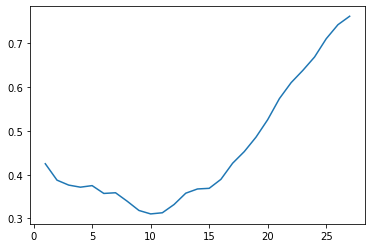

In [18]:
plt.plot(range(1, n_data), np.mean(errors_for_all, axis=0))

### 15) ここまでのすべてをひとつのセルにまとめると、こうなる。


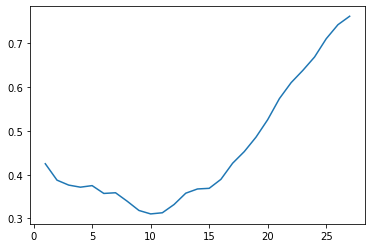

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df0 = pd.read_csv('lifesat.csv')
df_test = df0[df0['Country'] == 'Japan']
df = df0.drop(df0.index[df0['Country'] == 'Japan'])

countries = df['Country'].to_numpy()
gdp = df['GDP per capita'].to_numpy()
lifesat = df['Life satisfaction'].to_numpy()

n_data = len(gdp)
errors_for_all = list()
for i in range(n_data):
  gdp_valid = gdp[i] 
  sorted_indices = np.argsort(np.abs(gdp - gdp_valid)) 
  errors = list()
  for k in range(1, n_data):
    error = np.abs(np.mean(lifesat[sorted_indices[1:k+1]] - lifesat[i]))
    errors.append(error)
  errors_for_all.append(errors)
errors_for_all = np.array(errors_for_all)
mean_errors = np.mean(errors_for_all, axis=0)
k = 1 + np.argmin(np.mean(errors_for_all, axis=0))

plt.plot(range(1, n_data), np.mean(errors_for_all, axis=0))

## C. 最後に、選択されたkの値を使って、日本について生活満足度を予測する

In [20]:
k = 10

gdp_test = df_test['GDP per capita'].values[0]
diff_test = np.abs(gdp - gdp_test)
sorted_indices = np.argsort(diff_test)
top_k_lifesat = lifesat[sorted_indices[:k]]
prediction = np.mean(top_k_lifesat)
print('prediction: {}'.format(prediction))

target = df_test['Life satisfaction'].values[0]
print('target: {}'.format(target))

print('prediciton error: {}'.format(np.abs(target - prediction)))

prediction: 6.8100000000000005
target: 5.9
prediciton error: 0.9100000000000001
